In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.morphology import rectangle
from skimage.filters.rank import median, mean
from numpy import copy, array, square, sqrt, add, amax, amin, absolute

In [ ]:
def plot_two_images(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(25, 25))
    plt.subplot(1, 2, 1)
    io.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    io.imshow(image_2)
    plt.title(title_2)
    plt.show()

# Salt and Pepper Removal Attempts with Median and Averaging Filters

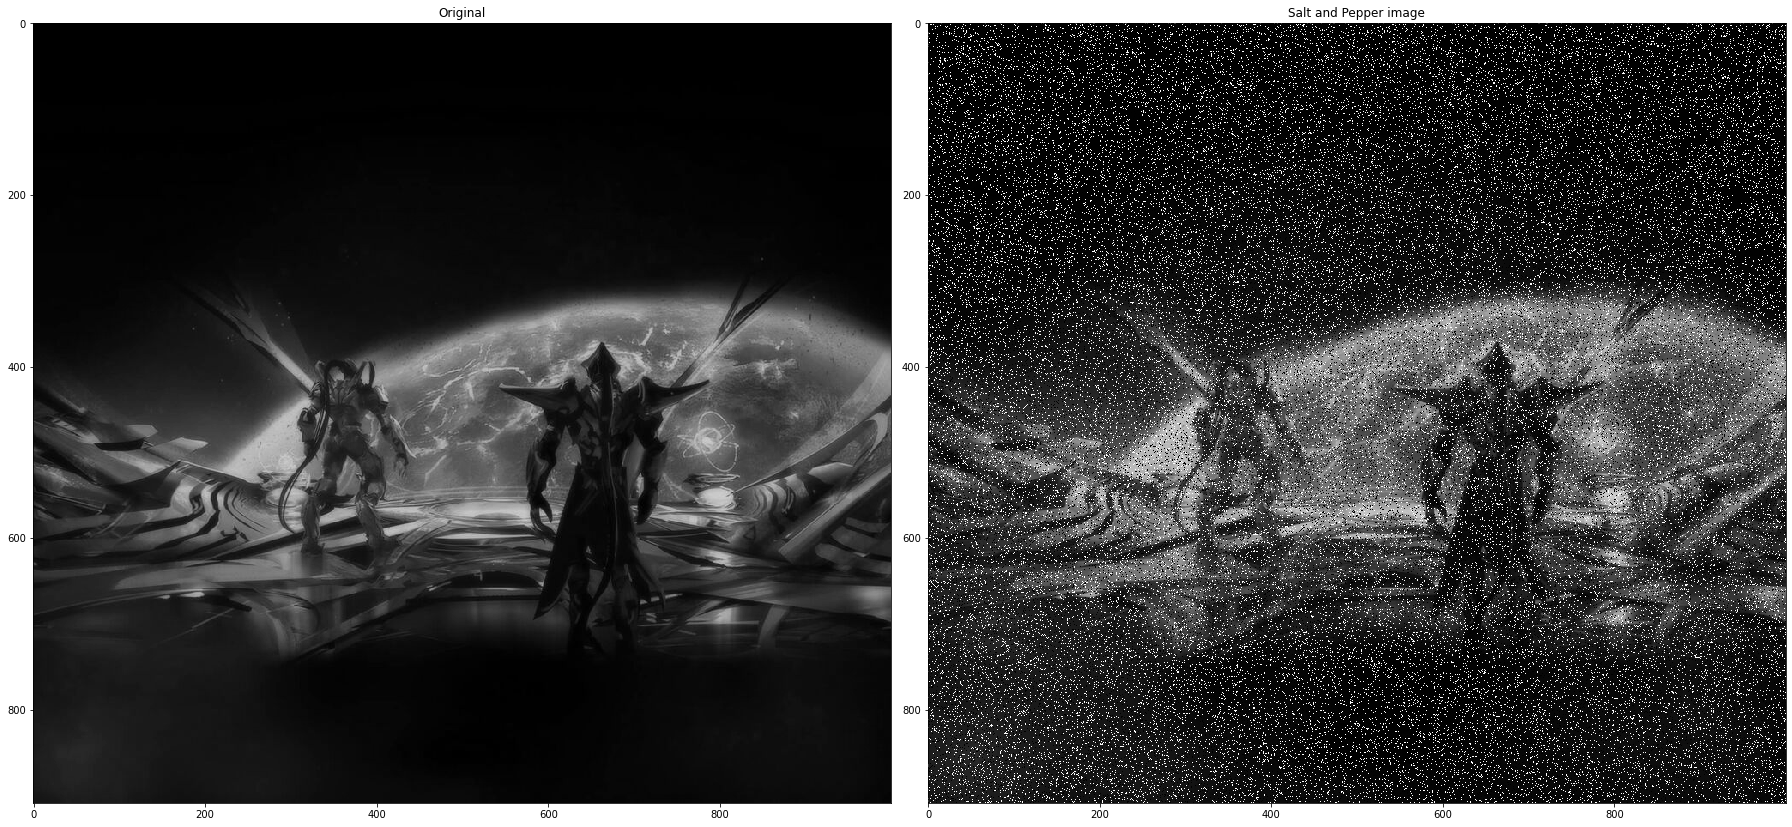

In [ ]:
tassadar_image_url = "https://static.wikia.nocookie.net/starcraft/images/e/ed/TassadarZealot_SCR_Art1.jpg/revision/latest/scale-to-width-down/1000?cb=20170422044530"
tassadar_image = io.imread(tassadar_image_url)
gray_tassadar = rgb2gray(tassadar_image)

# add salt and pepper  15%
noise_img = random_noise(gray_tassadar, mode='s&p', amount=0.15)

plot_two_images(gray_tassadar, noise_img, title_2="Salt and Pepper image")

In [ ]:
median_applied_noisy_image1 = median(noise_img, rectangle(3, 3))
median_applied_noisy_image2 = median(noise_img, rectangle(5, 5))
median_applied_noisy_image3 = median(noise_img, rectangle(10, 10))
median_applied_noisy_image4 = median(noise_img, rectangle(20, 20))

averaging_applied_noisy_image1 = mean(noise_img, rectangle(3, 3))
averaging_applied_noisy_image2 = mean(noise_img, rectangle(5, 5))
averaging_applied_noisy_image3 = mean(noise_img, rectangle(10, 10))
averaging_applied_noisy_image4 = mean(noise_img, rectangle(20, 20))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


3x3 median filter still has some noise visible, 3x3 averaging filter is a bit more clear than the noisy image but it is not as good as the median filter result

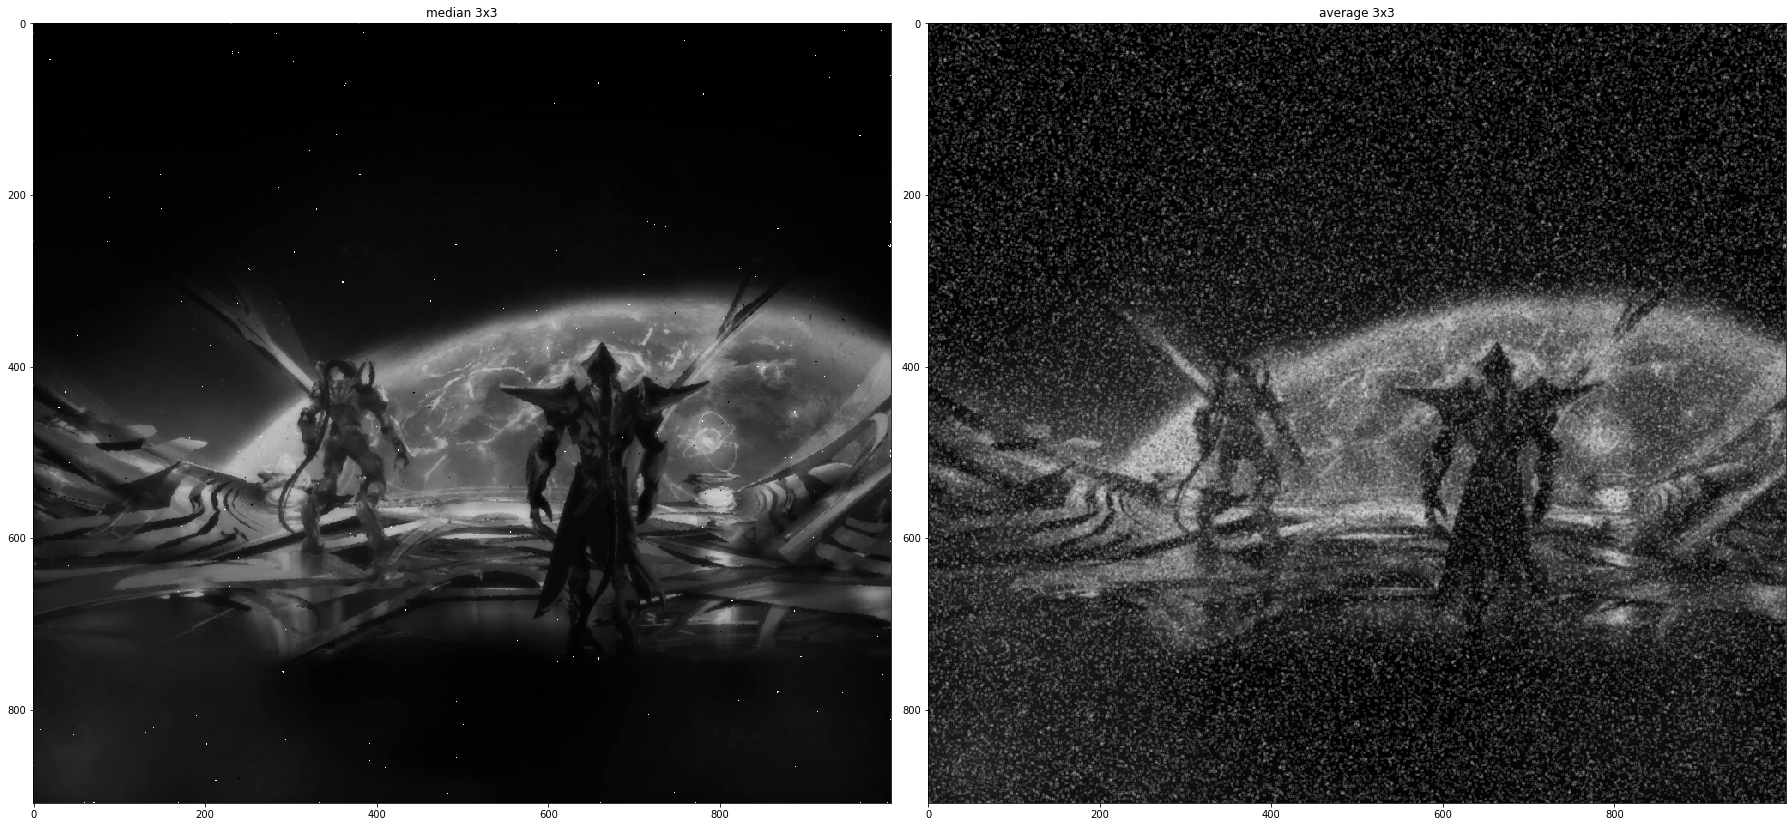

In [ ]:
plot_two_images(median_applied_noisy_image1, averaging_applied_noisy_image1, title_1="median 3x3", title_2="average 3x3")

5x5 median seems to have fixed the remaining noise which the 3x3 could not. Blurring effect is also not bad.

5x5 averaging filter does not possess the same success the median filter does. In fact it is not that much different from 3x3 median

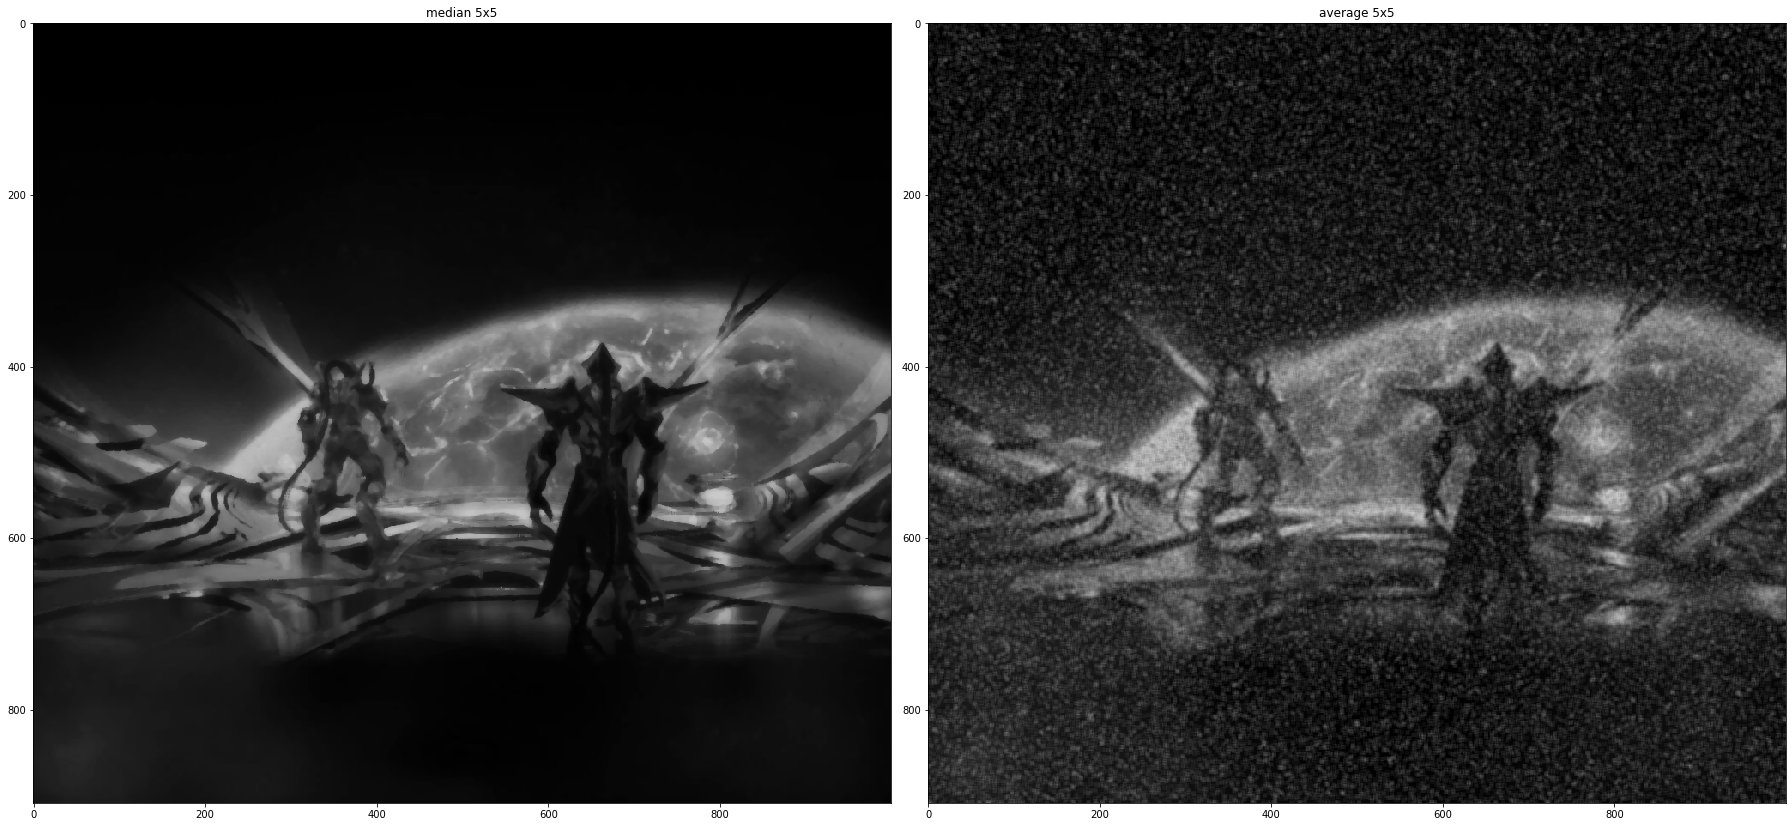

In [ ]:
plot_two_images(median_applied_noisy_image2, averaging_applied_noisy_image2, title_1="median 5x5", title_2="average 5x5")

10x10 median filter is starting to blur the image more visibly.

10x10 averaging filter also blurred the image, noise is not fixed.

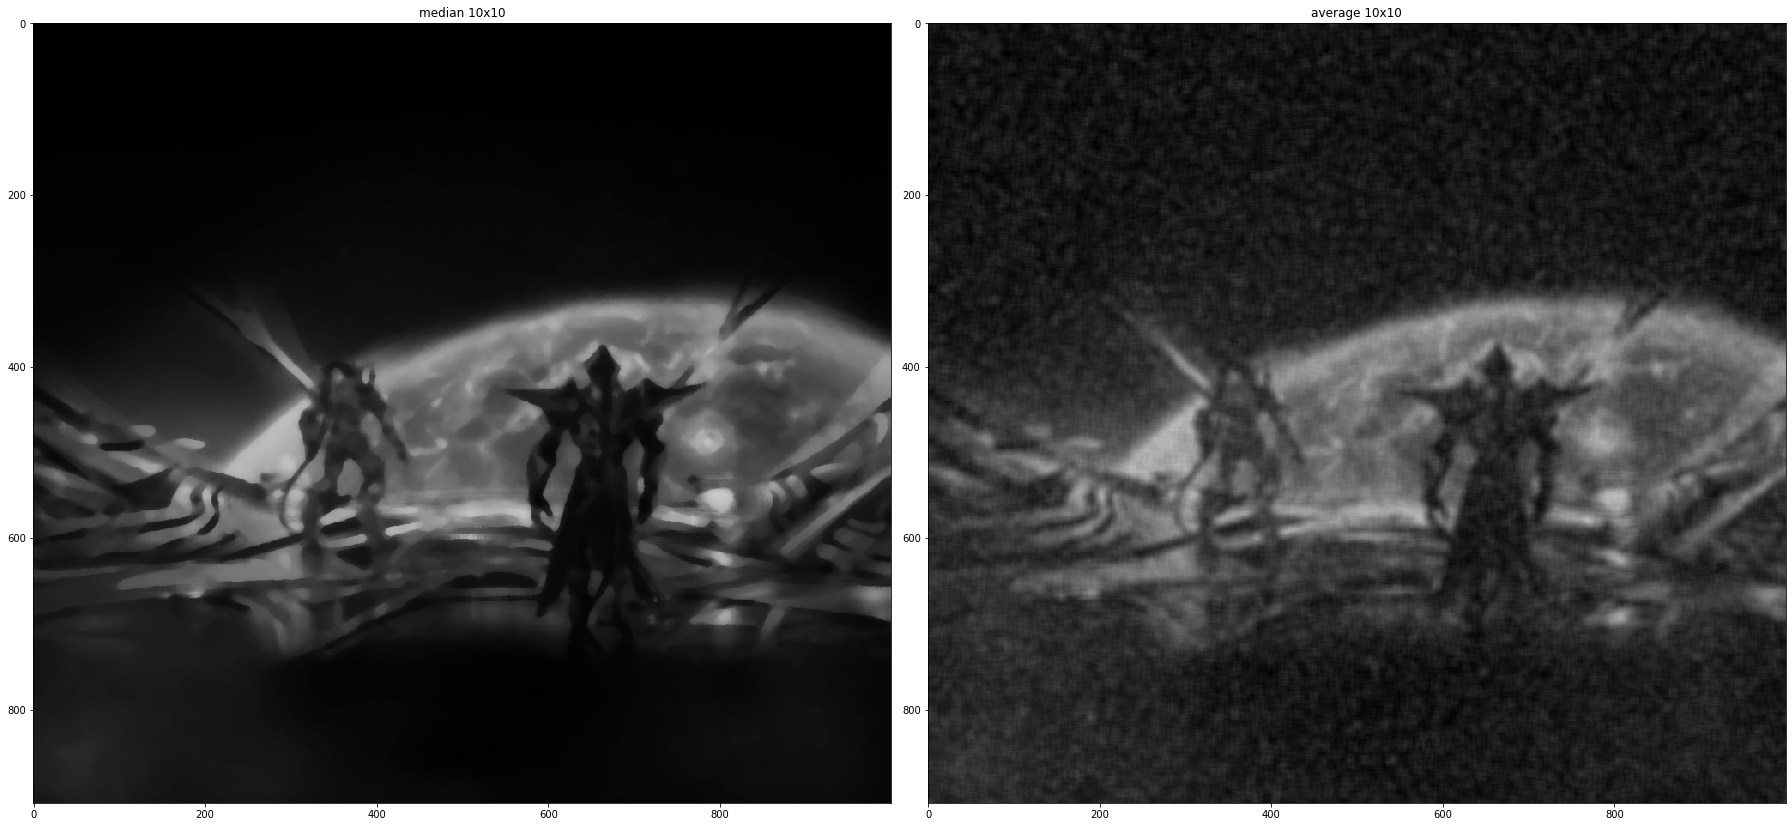

In [ ]:
plot_two_images(median_applied_noisy_image3, averaging_applied_noisy_image3, title_1="median 10x10", title_2="average 10x10")

Both 20x20 median and 20x20 averaging filters blurred the image way too much, starting to lose edges.

Even with a bigger kernel averaging filter does not get rid of the noise.

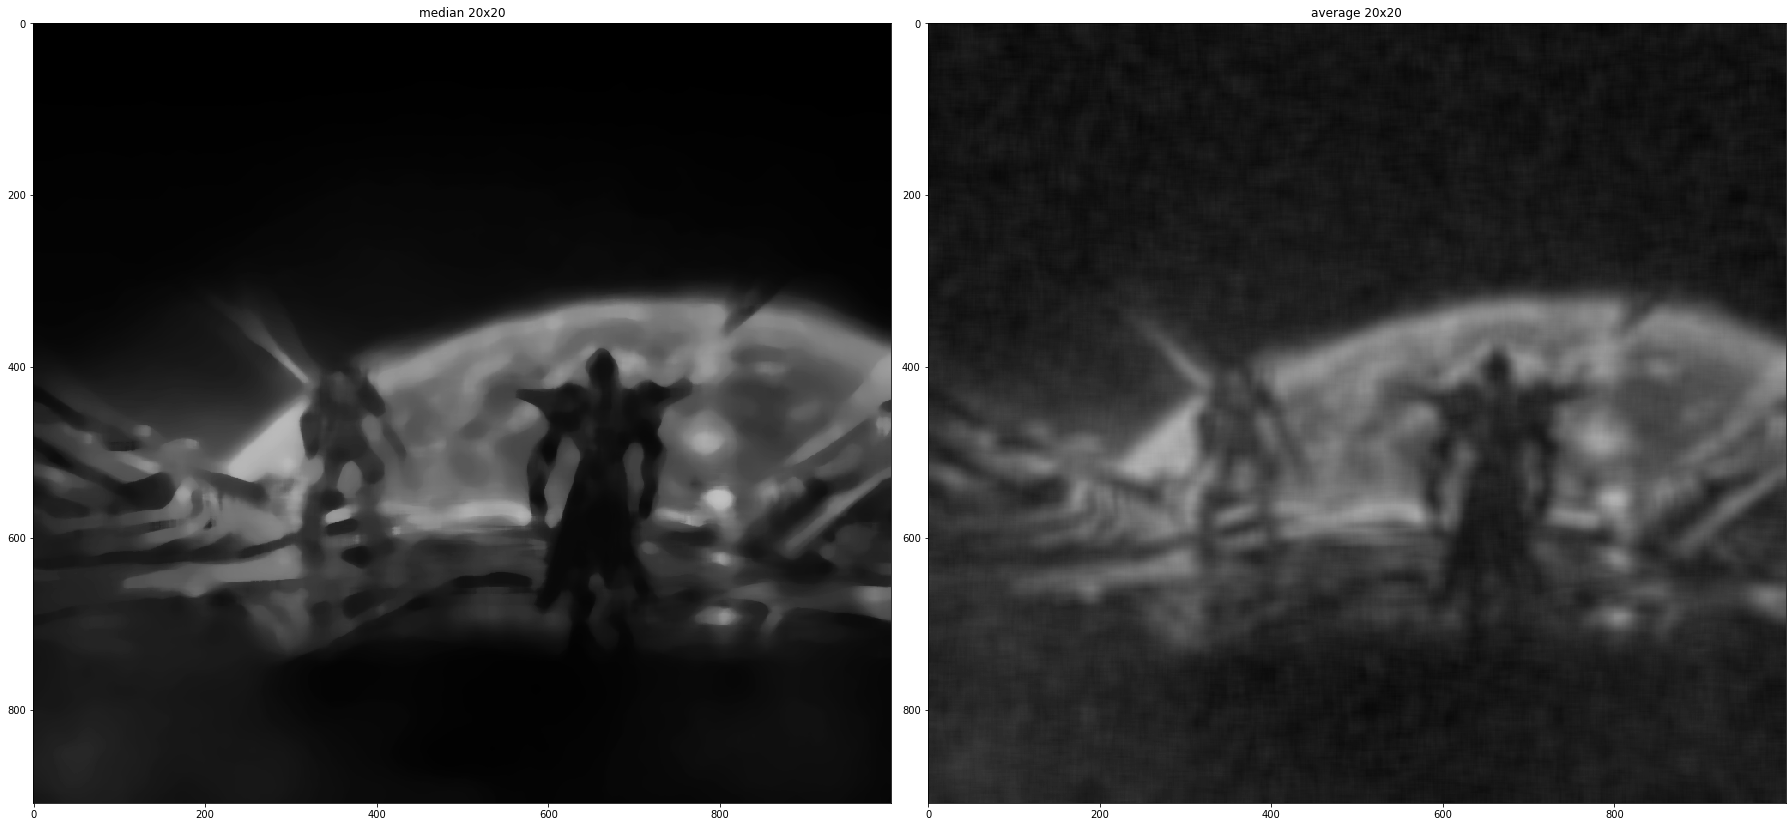

In [ ]:
plot_two_images(median_applied_noisy_image4, averaging_applied_noisy_image4, title_1="median 20x20", title_2="average 20x20")

# EDGE DETECTION WITH ROBERT FILTERS

In [ ]:
# this function simulates the convolation of the roberts filter [[1,0][0,-1]] on the image
def apply_roberts_filter1(gray_image):
    for row in range(0, len(gray_image) - 1):
        for column in range(0, len(gray_image[0]) - 1):
            gray_image[row][column] = gray_image[row][column] - gray_image[row+1][column+1]
    return gray_image[1:-1][1:-1]

# this function simulates the convolation of the roberts filter [[0,1][-1,0]] on the image
def apply_roberts_filter2(gray_image):
    for row in range(0, len(gray_image) - 1):
        for column in range(0, len(gray_image[0]) - 1):
            gray_image[row][column+1] = gray_image[row][column+1] - gray_image[row+1][column]
    return gray_image[1:-1][1:-1]

# I wanted to incorporate linear stretching to use on the final results
# because addition of two filter images may result in values out of range [0,1]
# it is used to put the pixel values back in [0,1]
def stretch_linear(image):
    max_value = amax(image)
    min_value = amin(image)
    max_diff = max_value - min_value

    for row in range(0, len(image)):
        for column in range(0, len(image[0])):
            image[row][column] = (image[row][column] - min_value) / max_diff

To apply edge detection with Roberts filters I have tried two different ways. The first way I implement uses two kernels seperately on the original image. The values of the pixels of the resulting images squared and these images are added together, and then to find the final value of the pixel, square root of the pixel values are taken.

For more information this is the website from which I have read the method:
 https://homepages.inf.ed.ac.uk/rbf/HIPR2/roberts.htm

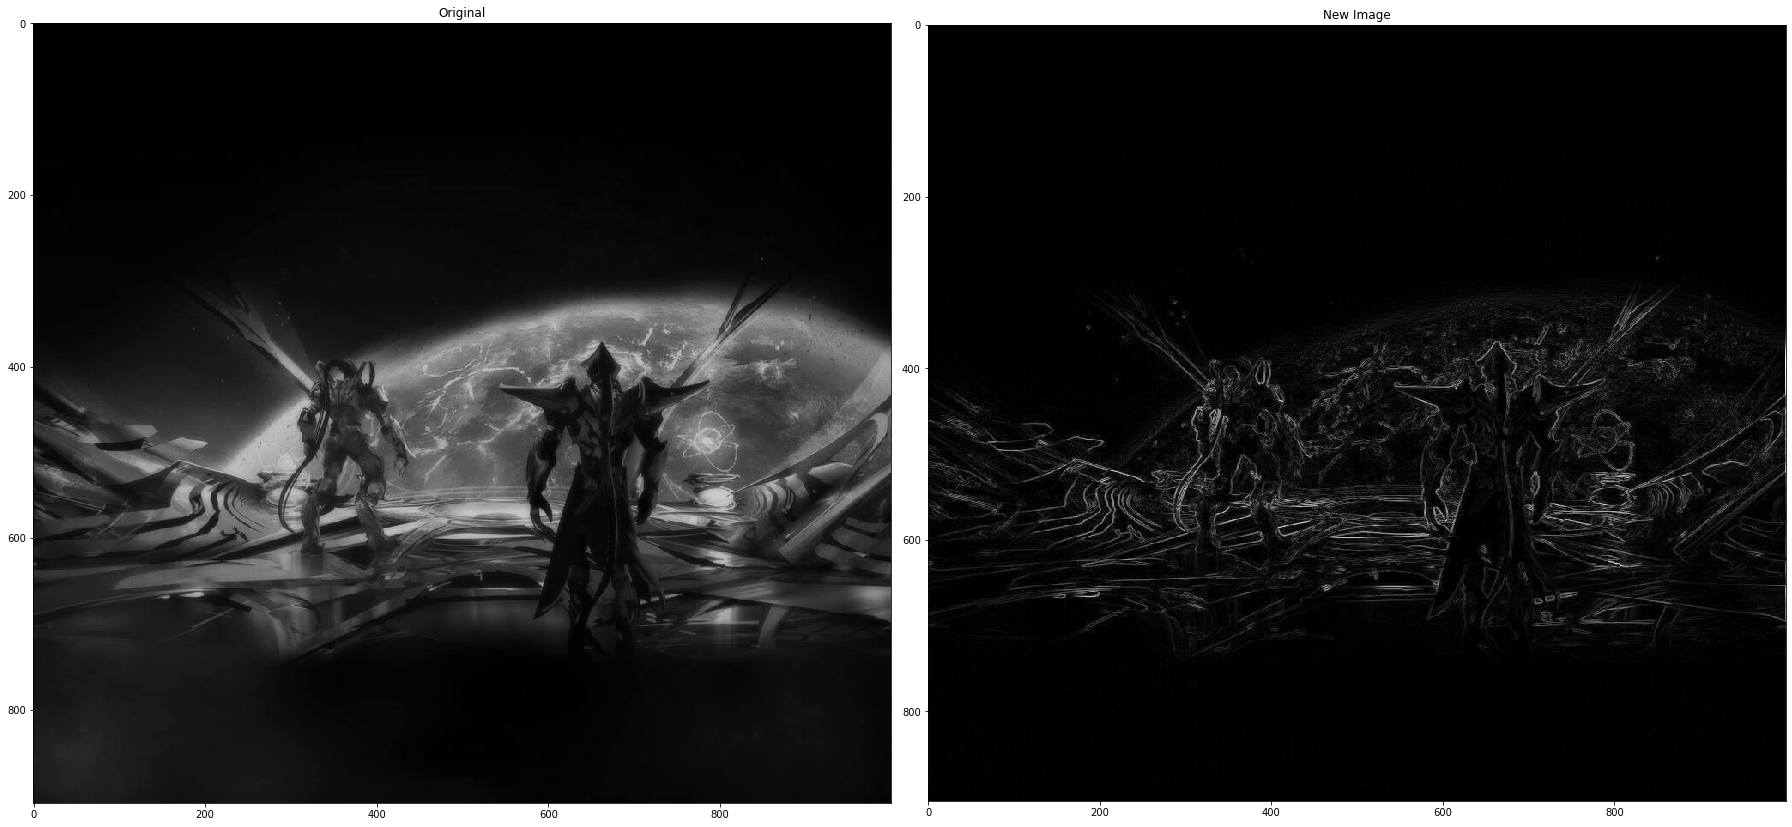

In [ ]:
robert1 = array(gray_tassadar).copy()
robert2 = array(gray_tassadar).copy()
robert3 = list()
robert4 = list()

robert3 = apply_roberts_filter1(robert1)
robert4 = apply_roberts_filter2(robert2)

robert3 = square(robert3)
robert4 = square(robert4)

final_result = add(robert3, robert4)
final_result = sqrt(final_result)

stretch_linear(final_result)
plot_two_images(gray_tassadar, final_result)

In the second method, after applying the Robert filters, one chooses to add the values together after finding the absolute values of the pixels. Since a lot of multiplication and root operations have to be done for the method I used above, this method is used as an alternative which is computationally cheaper.

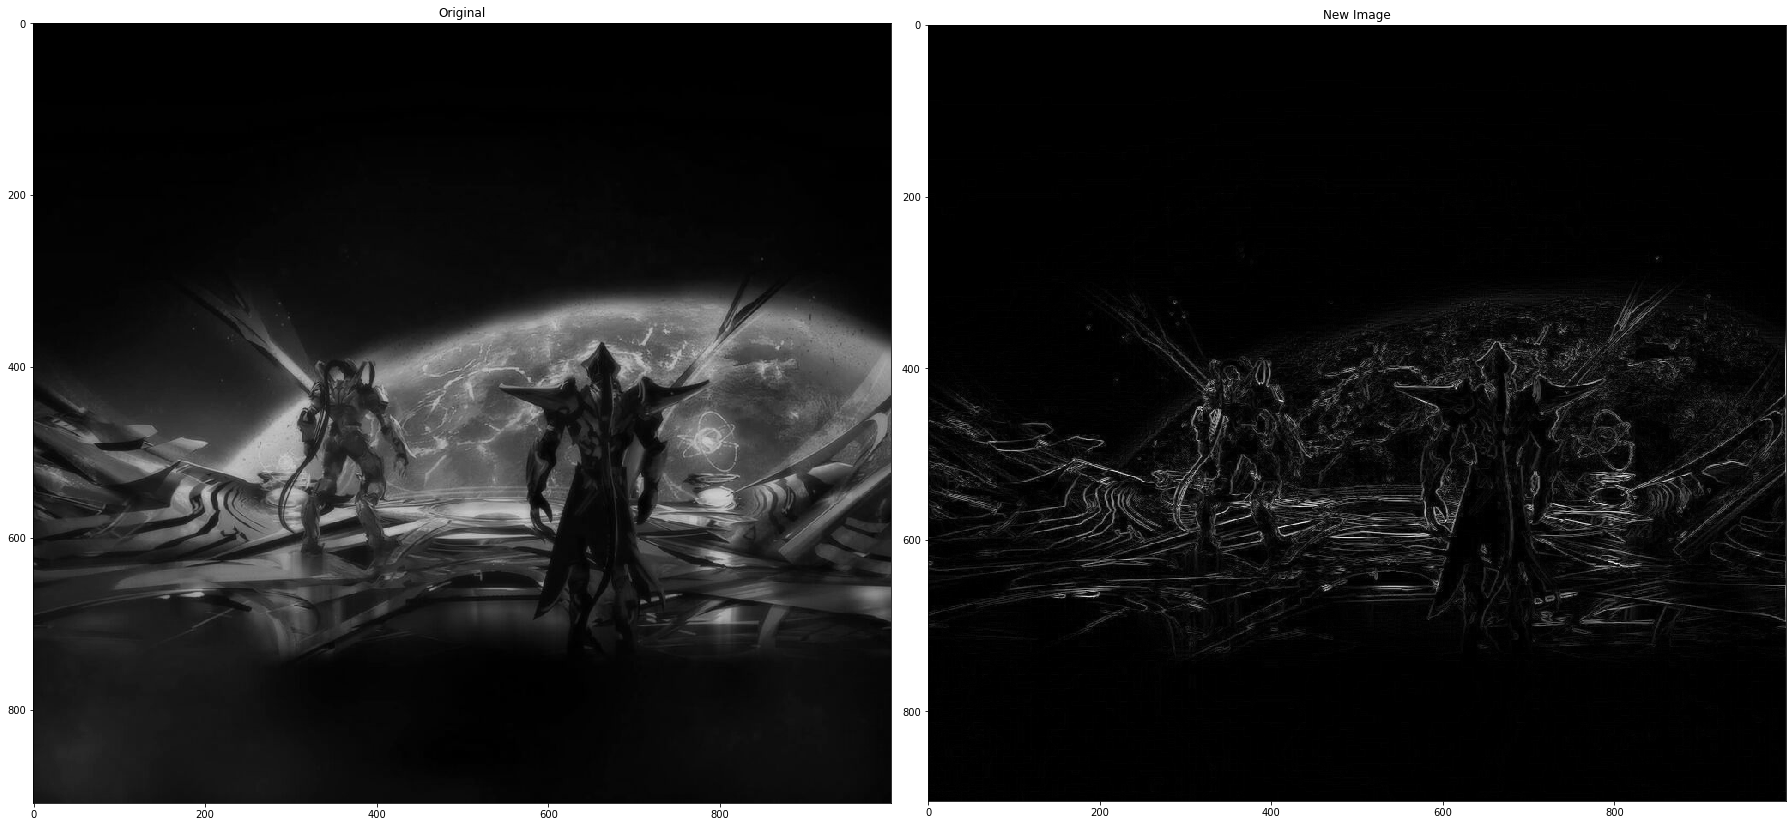

In [ ]:
robert5 = array(gray_tassadar).copy()
robert6 = array(gray_tassadar).copy()
robert7 = list()
robert8 = list()

robert7 = apply_roberts_filter1(robert5)
robert8 = apply_roberts_filter2(robert6)

robert7 = absolute(robert7)
robert8 = absolute(robert8)
    
final_result2 = add(robert7, robert8)
stretch_linear(final_result2)
plot_two_images(gray_tassadar, final_result2)

Since I discern no critical difference between these two results, it seems ideal to use the addition method to avoid the multiplication and root operations which are used in the first method

# Canny Edge Detector

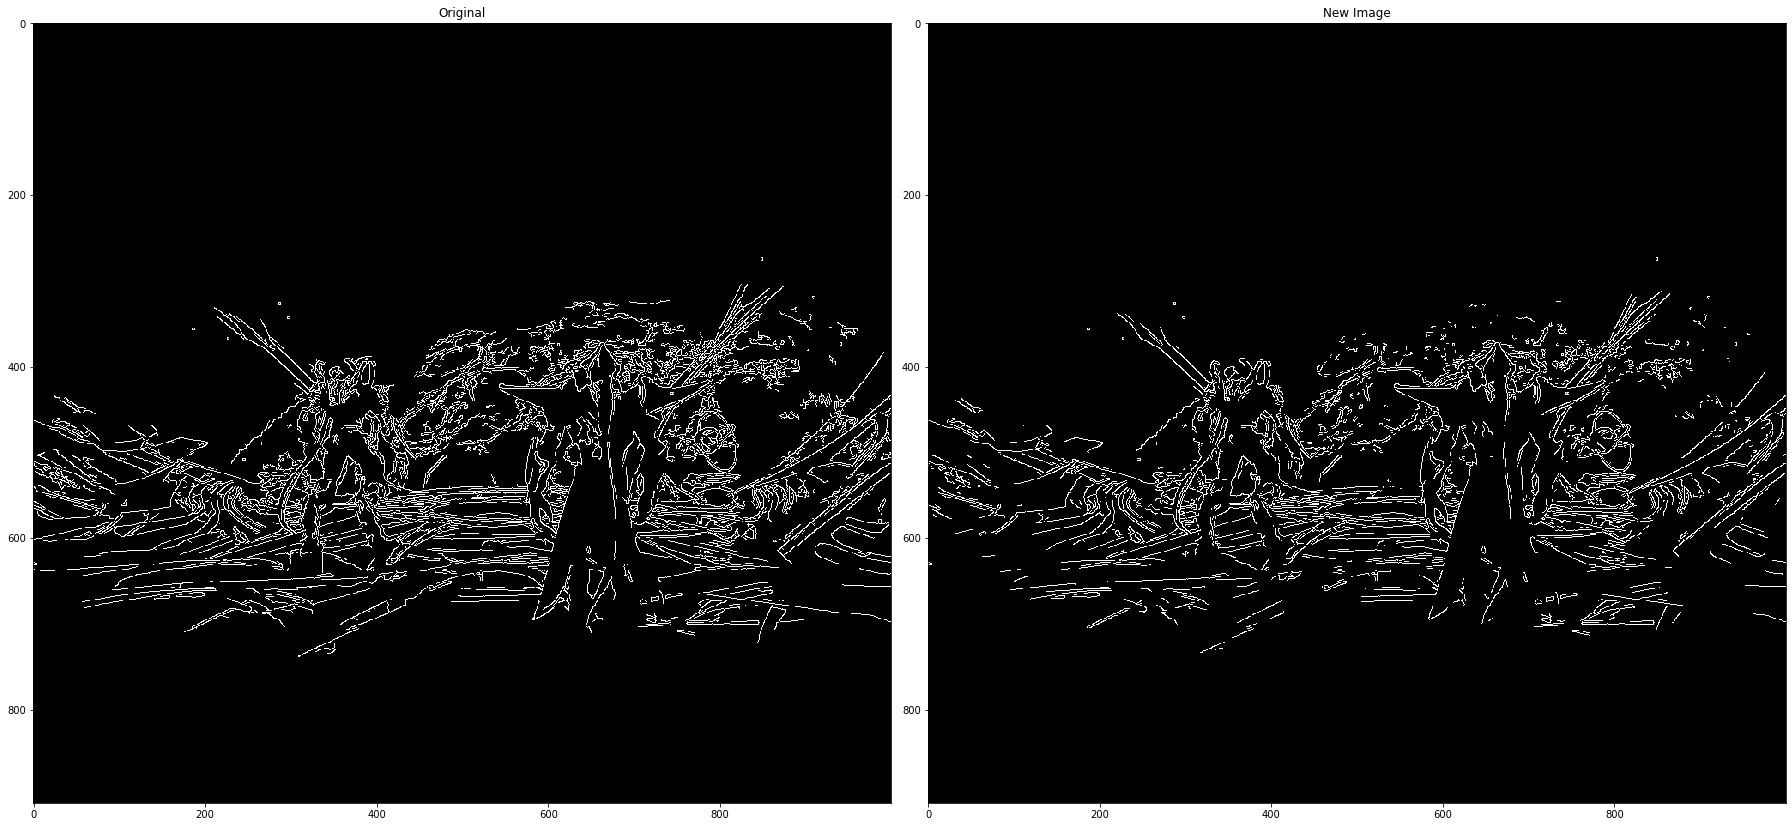

In [ ]:
import cv2 as cv

tassadar_image_url_for_canny = "https://static.wikia.nocookie.net/starcraft/images/e/ed/TassadarZealot_SCR_Art1.jpg/revision/latest/scale-to-width-down/1000?cb=20170422044530"

tassadar_image_for_canny = io.imread(tassadar_image_url_for_canny)
gray_tassadar_for_canny = cv.cvtColor(tassadar_image_for_canny, cv.COLOR_BGR2GRAY)

edges = cv.Canny(gray_tassadar_for_canny, 50, 150)
edges2 = cv.Canny(gray_tassadar_for_canny, 100, 150)

plot_two_images(edges, edges2)

In the example above, I used canny edge detector on the same image with two different thresholds. In the first picture, values greater than 150 are drawn for sure and values between 50 and 150 are drawn only if they are connected to a strong value, which is 150 or higher. Values below 50 are not detected. When the two results are compared, one can see that there are more edges detected on the left one (hair of the figure which stands in the background is clearer and some lines are connected on the left side of the picture). However, the change is not that significant in my opinion, which says that there are not much pixels between [50 100] range which are connected to 150 and above pixels, which are defined to be strong here. The additional edges we see on the left pictures are between [50 100] values and are connected to pixels that are of 150 or higher value